In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
data = pd.read_csv("ds_salaries.csv")

In [71]:
data.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


Description of columns -
1. work_year - The year the salary was paid.
2. experience level - EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
3. employement_type - PT Part-time FT Full-time CT Contract FL Freelance
4. remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
5. company_size - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)
6.employee residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.

In [16]:
# size of data
data.shape

(607, 12)

there are 607 rows and 12 columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [18]:
data.isnull().sum()   # chckuing for missing values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

As we can see there are no missing values in the dataset.

In [19]:
#now lets chck the columns of data
data.columns 

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

We can eliminate ennamed column , salary , currency, work_year aand size of company

In [72]:
data.drop(["Unnamed: 0", "salary","work_year","salary_currency","company_size"], axis = 1, inplace = True)

In [73]:
data.head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,MI,FT,Data Scientist,79833,DE,0,DE
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP
2,SE,FT,Big Data Engineer,109024,GB,50,GB


In [74]:
duplicate = data[data.duplicated()]

In [75]:
duplicate.head(2)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
108,SE,FT,Data Engineer,150000,US,100,US
217,MI,FT,Data Scientist,90734,DE,50,DE


In [76]:
duplicate.shape

(51, 7)

There are 51 duplicate rows now , we can delete them.

In [77]:
data.drop_duplicates().head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,MI,FT,Data Scientist,79833,DE,0,DE
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP
2,SE,FT,Big Data Engineer,109024,GB,50,GB


In [78]:
jobs = data.job_title.unique()

In [79]:
jobs

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [80]:
len(jobs)

50

It is clear that total of 50 data science related jobs are avaliable.

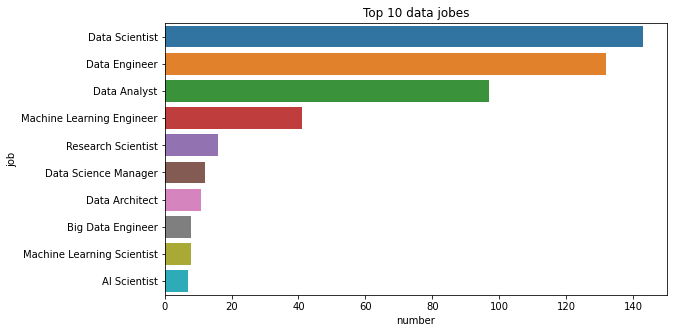

In [52]:
job_title_order = data['job_title'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='job_title', order= job_title_order)
plt.title('Top 10 data jobes')
plt.xlabel('number')
plt.ylabel('job');

In data , data science is the leading job followed by data engineer then data analyst...

In [53]:
# let us explore the data scientist job
data.loc[data['job_title'] == 'Data Scientist'].head(3)

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
0,MI,FT,Data Scientist,79833,DE,0,DE
7,MI,FT,Data Scientist,35735,HU,50,HU
10,EN,FT,Data Scientist,51321,FR,0,FR


In [56]:
data.experience_level.unique() #MI - MIDLEVEL , SE - SENIORLEVEL , EN - ENTRY LEVEL , EX - EXECUTUVELEVEL

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

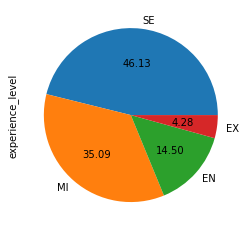

In [67]:
data['experience_level'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Clearly, 46.13 % data scientist jobs are senior level. 4.28% are executive level

In [59]:
data.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

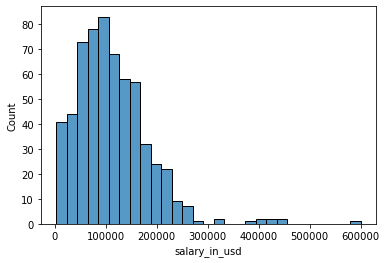

In [70]:
sns.histplot(data['salary_in_usd']) 
plt.show()

Very few people have salary above 300000 USD. Many have around 100000

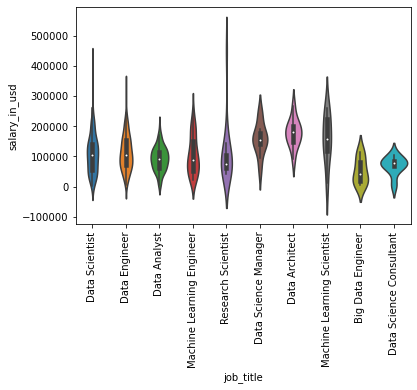

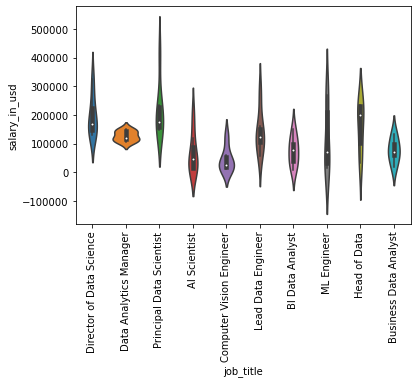

In [30]:
for column in data.columns:
    if column != "salary_in_usd":
        if column == "job_title":
             sns.violinplot(data=data, y='salary_in_usd',x=column, order=data['job_title'].value_counts().index[:10])
             plt.xticks(rotation=90)
             plt.show()
             sns.violinplot(data=data, y='salary_in_usd',x=column, order=data['job_title'].value_counts().index[10:20])
             plt.xticks(rotation=90)
             plt.show()

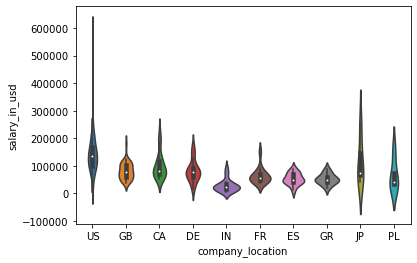

In [45]:
for column in data.columns:
    if column != "salary_in_usd":
        if column =="company_location":
            sns.violinplot(data=data, y='salary_in_usd',x=column,order=data['company_location'].value_counts().index[:10])
            plt.show()

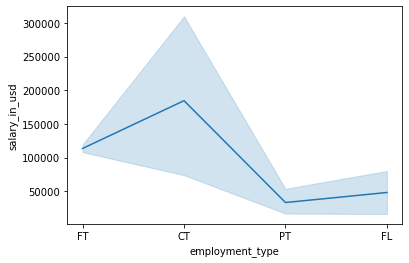

In [47]:
for column in data.columns:
    if column != "salary_in_usd":
        if column =="employment_type":
            sns.lineplot(data=data, y='salary_in_usd',x=column)
            plt.show()

The salaries given to contract level jobs are the highest while part time is the lowest.

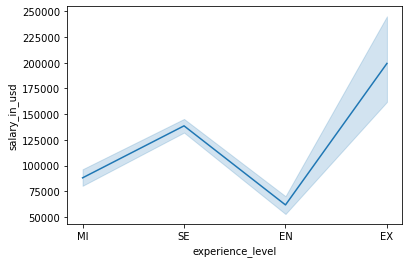

In [48]:
for column in data.columns:
    if column != "salary_in_usd":
        if column =="experience_level":
            sns.lineplot(data=data, y='salary_in_usd',x=column)
            plt.show()

It indicates that the salary given to entry level jobs is very low as compare to executive level.

In [51]:
#lets chck wht is highest paying job
salary_med = data[["job_title","salary_in_usd"]].groupby("job_title").median()
salary_med.head(3)

,salary_in_usd
job_title,
3D Computer Vision Researcher,5409.0
AI Scientist,45896.0
Analytics Engineer,179850.0


Text(0, 0.5, 'Salary')

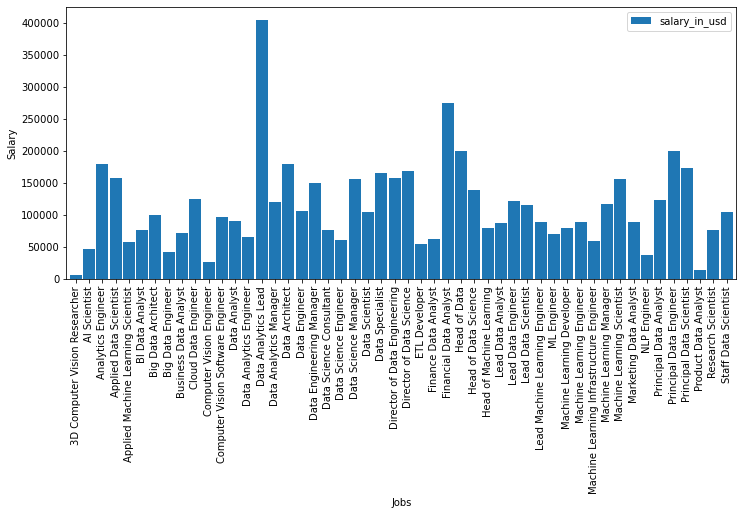

In [52]:
plt.rcParams["figure.figsize"] = (12, 5)
salary_med.plot(kind='bar',width = 0.9)
plt.legend()
plt.xlabel('Jobs')
plt.ylabel('Salary')

The above bargraph shows data analytics lead is the highest paying job followed by financial data analyst.

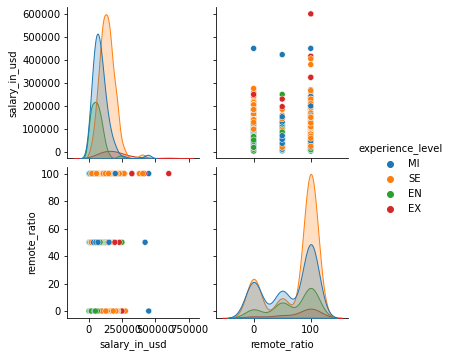

In [58]:
sns.pairplot(data,hue='experience_level')

<AxesSubplot:xlabel='employment_type', ylabel='experience_level'>

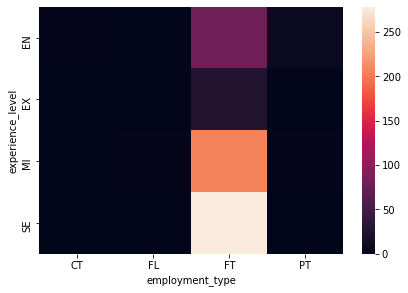

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(pd.crosstab(data['experience_level'],data['employment_type']))

There is not much high correlation between these two variables. EX is correlatd with FT.